<a href="https://colab.research.google.com/github/S-odland/ME224-projects/blob/master/contagion_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 24 - agent based models

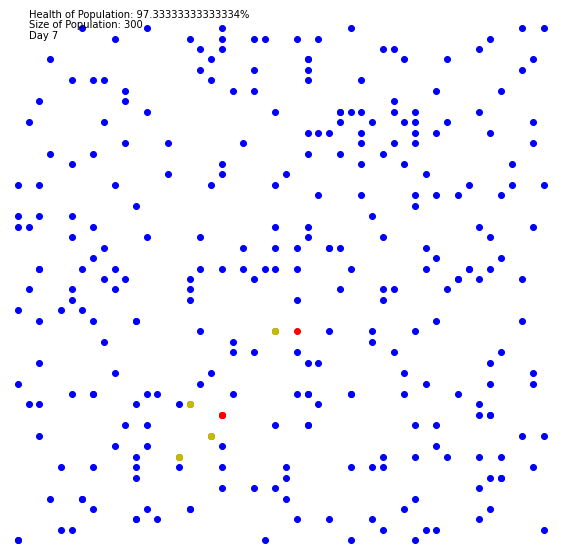

KeyboardInterrupt: ignored

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
import sys

# function will make the board with the starter random people (4 and random locations)
def makeBoard():
    
    plt.rcParams['figure.figsize'] = [10,10]
    world = np.zeros( (50,50), dtype = int)

    height = world.shape[0]
    width = world.shape[1]
    
    # this will be a list of list with the location and its health and time sick
    status = list()
    # start of with a population of 4 and they have an ability to move if a neighboring position is not full
    for i in range(300):
        # randomizing possible locations of for starter people
        xRand = random.randint(1,49)
        yRand = random.randint(1,49)
        
        if i % 150 == 0:
          status.append([xRand,yRand,1,0])
        else:
          status.append([xRand,yRand,0,0])
    
    return world,status

# 0 = uninfected, 1 = contagious, 2 = immune
def getHealth(status):
    
    u = 0
    c = 0
    i = 0    
    population = len(status)
    
    
    for j in range(len(status)):
        if status[j][2] == 0:
            u += 1
        elif status[j][2] == 1:
            c += 1
        elif status[j][2] == 2:
            i += 1

    
    health = (u + i)/population * 100
    
    return health

def checkPos(status,direction):
    
    b = 0
    
    for i in range(len(status)):
        if direction == 0:
            for j in range(len(status)):
                if status[i][1] + 1 == status[j][1] and status[i][0] == status[j][0]:
                    b = 0
                else:
                    b = 1
        elif direction == 2:
            for j in range(len(status)):
                if status[i][1] - 1 == status[j][1] and status[i][0] == status[j][0]:
                    b = 0
                else:
                    b = 1
        elif direction == 1:
            for j in range(len(status)):
                if status[i][0] + 1 == status[j][0] and status[i][1] == status[j][1]:
                    b = 0
                else:
                    b = 1
        elif status[i][0] == 3:
            for j in range(len(status)):
                if status[i][0] - 1 == status[j][0] and status[i][1] == status[j][1]:
                    b = 0
                else:
                    b = 1
    return b


def checkNeighbor(status):
    for i in range(len(status)):
        for j in range(len(status)):
            if status[i][1] + 1 == status[j][1] and status[i][0] == status[j][0]:
                if status[j][2] == 0 and status[i][2] == 1:
                    status[j][2] == 1
                elif status[j][2] == 1 and status[i][2] == 0:
                    status[i][2] == 1

            if status[i][1] - 1 == status[j][1] and status[i][0] == status[j][0]:
                if status[j][2] == 0 and status[i][2] == 1:
                    status[j][2] == 1
                elif status[j][2] == 1 and status[i][2] == 0:
                    status[i][2] == 1

            if status[i][0] + 1 == status[j][0] and status[i][1] == status[j][1]:
                if status[j][2] == 0 and status[i][2] == 1:
                    status[j][2] == 1
                elif status[j][2] == 1 and status[i][2] == 0:
                    status[i][2] == 1

            if status[i][0] - 1 == status[j][0] and status[i][1] == status[j][1]:
                if status[j][2] == 0 and status[i][2] == 1:
                    status[j][2] == 1
                elif status[j][2] == 1 and status[i][2] == 0:
                    status[i][2] = 1
    return status

# 0 = up, 1 = right, 2 = down, 3 = left
def move(status):
    for i in range(len(status)):
        direction = random.randint(0,3)
        if direction == 0:
            status = checkNeighbor(status)
            if checkPos(status,direction) == 1:
                
                status[i][1] += 1
        elif direction == 2:
            status = checkNeighbor(status)
            if checkPos(status,direction) == 1:
               
                status[i][1] -= 1
        elif direction == 1:
            status = checkNeighbor(status)
            if checkPos(status,direction) == 1:
                
                status[i][0] += 1
        elif status[i][0] == 3:
            status = checkNeighbor(status)
            if checkPos(status,direction) == 1:
               
                status[i][0] -= 1
            
    for i in range(len(status)):
        status[i][0] = status[i][0] % 50
        status[i][1] = status[i][1] % 50
        
    return status


def contagion(status,day):
    
    world = makeBoard()[0]
    width = world.shape[1]
    height = world.shape[0]
    
    x = list()
    y = list()
    h = list()
    d = list()
    yRed = list()
    yBlue = list()
    yYellow = list()
    xRed = list()
    xBlue = list()
    xYellow = list()
      
    
    for i in range(len(status)):
        x.append(status[i][0])
        y.append(status[i][1])
        h.append(status[i][2])
    
    
    for i in range(len(x)):
        if h[i] == 0:
            xBlue.append(x[i])
            yBlue.append(y[i])
            
        elif h[i] == 1:
            xRed.append(x[i])
            yRed.append(y[i])

            if status[i][3] == 5:
              xYellow.append(x[i])
              yYellow.append(y[i])
              status[i][2] == 2
            else:
              status[i][3] += 1
              
        elif h[i] == 2:
            xYellow.append(x[i])
            yYellow.append(y[i])
    
    
    plt.plot(xBlue,yBlue,'bo',xRed,yRed,'ro',xYellow,yYellow,'yo')
    plt.axis( [-1, width+1, -1, height+1] )
    plt.axis('off')
    HEALTH = 'Health of Population: ' + str(getHealth(status)) + '%'
    plt.text(1,height,HEALTH)
    DAY = 'Day ' + str(int(day))
    plt.text(1,height-2,DAY)
    POPULATION = 'Size of Population: ' + str(len(status))
    plt.text(1,height -1,POPULATION)
    clear_output(True)
    plt.show()
    return status

def update():
    
    day = 0
    status = makeBoard()[1]
    while(1):

        status = contagion(status,day)
        status = move(status)
        day += 1     
 

update()